In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("Display.max_columns", None)
pd.set_option("Display.max_rows", None)


## <span style="color:lightblue"> **Problem Statement 2:**</span>
Write a Python program that reads the "Credit Card Customer Data.csv". The following are the tasks that need to be taken into consideration while constructing the solution to Segregate customers based on the data provided with the help of k-means clustering.

**Task to be performed:**
1. Load the Given CSV file into a DataFrame
2. Find missing values and drop the unnecessary columns
3. Univariate and bivariate analysis
4. Standardize the whole dataset
5. Find the within-cluster sum of square
6. Find silhouette score
7. Use a line plot using matplotlib to find scores for different sizes of K and choose the best size of the cluster and build the final model
8. Observe Cluster behavior with different columns
9. Print Co-ordinates of all centroid and silhouette scores for the final model

In [3]:
#Task 1: Loading the csv file into a dataframe
credit_card_df = pd.read_csv("./../Assignment_files/Assignment5/Credit Card Customer Data.csv")
credit_card_df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
#Task 2 finding the missing values
credit_card_df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [5]:
#checking for duplicated values also
credit_card_df.duplicated().sum()

0

In [7]:
#Dropping the unnecessary column: in this case the Sl_No column
credit_card_df.drop("Sl_No", axis=1, inplace=True)
credit_card_df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


In [9]:
#Task: Univariate and bivariate analysis
credit_card_df.describe()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [11]:
credit_card_df.shape

(660, 6)

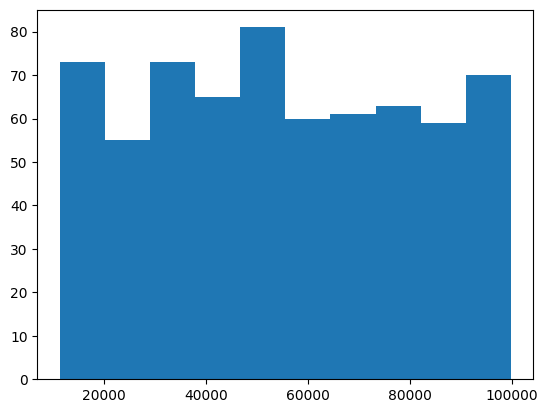

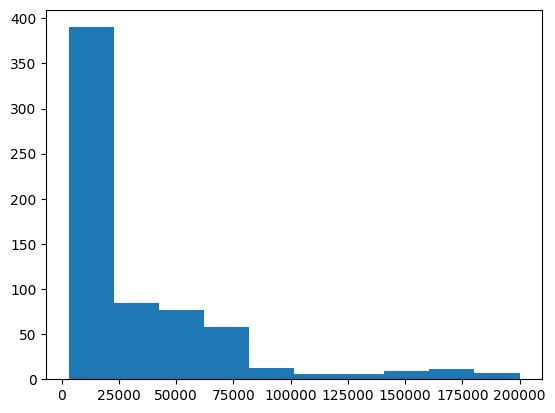

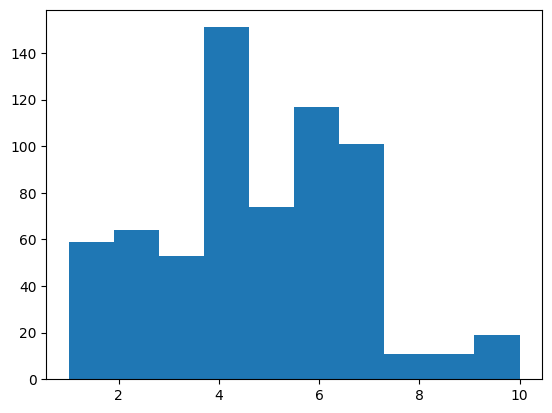

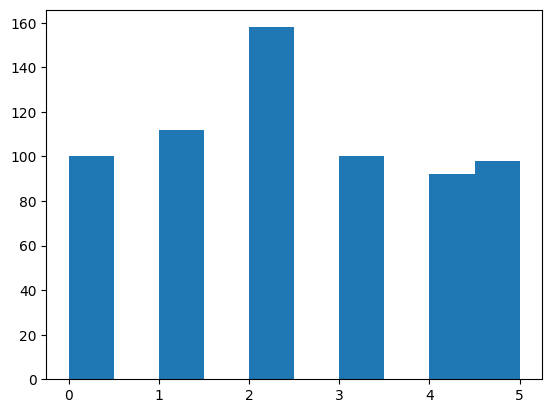

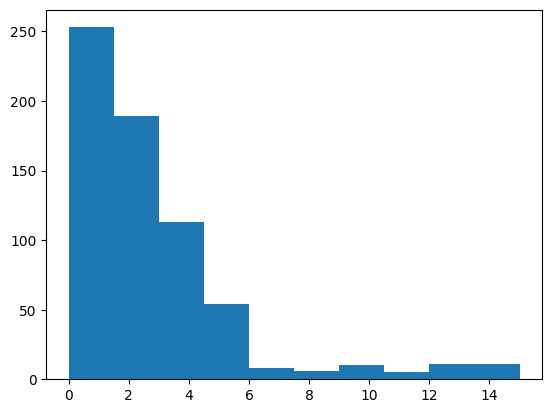

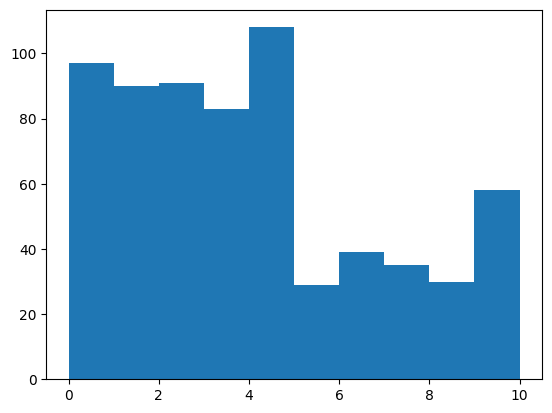

In [17]:
#check for hist distribution
for column in credit_card_df.columns:
    fig, ax = plt.subplots()
    plt.hist(credit_card_df[column])

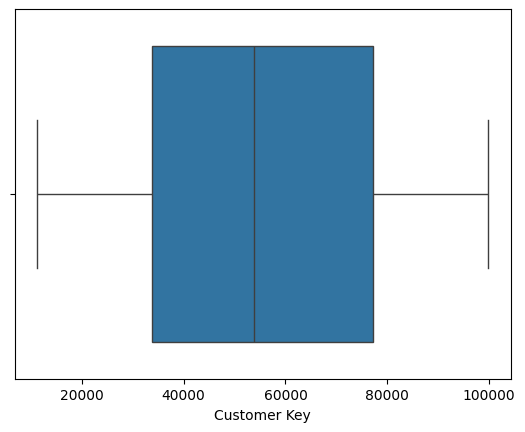

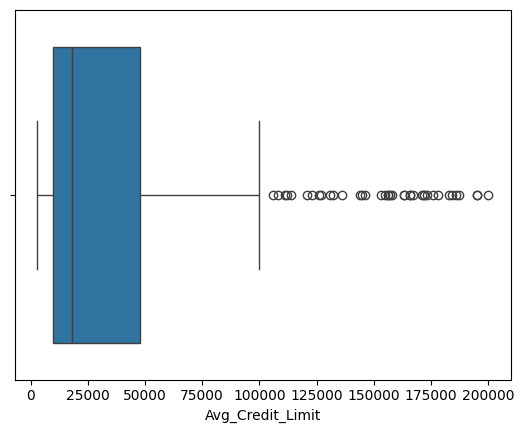

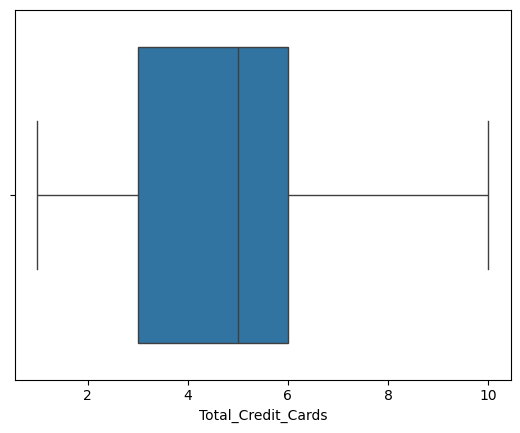

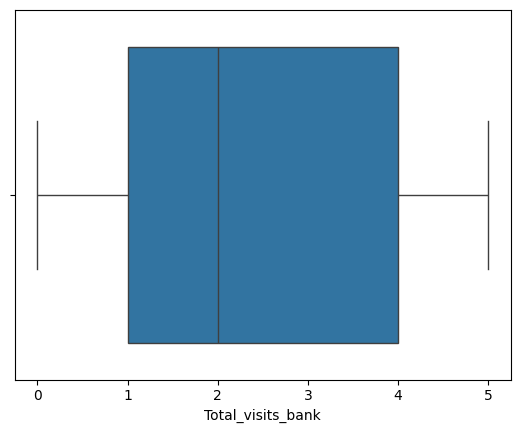

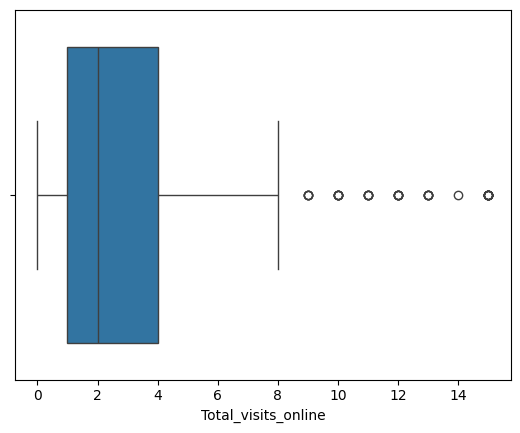

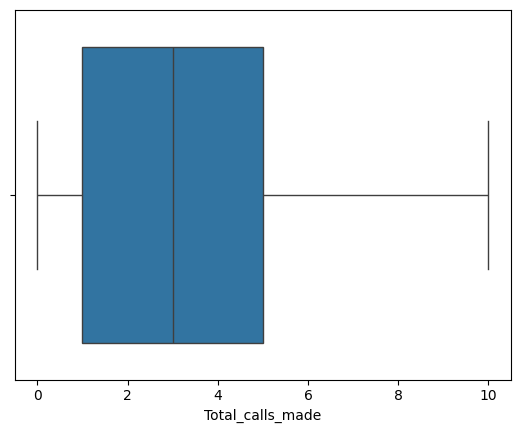

In [20]:
#check for outliers
for column in credit_card_df.columns:
    fig, ax = plt.subplots()
    sns.boxplot(credit_card_df[column], orient="h")